In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization 

In [38]:
general_data = pd.read_csv(r'D:\Feyn Internship\Final_project\archive_4\General Data 2014-2020.csv')
country_wise = pd.read_csv(r'D:\Feyn Internship\Final_project\archive_4\Country Quater Wise Visitors.csv')
country_yearly = pd.read_csv(r'D:\Feyn Internship\Final_project\archive_4\Country Wise Yearly VIsitors.csv')

In [39]:
country_yearly.head()

,Country,2014,2015,2016,2017,2018,2019,2020
0,Canada,268485,281306,317239,335439,351040,351859,122868
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,Argentina,9731,9351,12308,14875,16345,12844,4294
3,Brazil,19563,20610,21289,24453,26579,25422,8092
4,Mexico,13978,14049,15689,18114,19909,20766,4580


In [40]:
country_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  63 non-null     object
 1   2014     63 non-null     int64 
 2   2015     63 non-null     int64 
 3   2016     63 non-null     int64 
 4   2017     63 non-null     int64 
 5   2018     63 non-null     int64 
 6   2019     63 non-null     int64 
 7   2020     63 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 4.1+ KB


In [41]:
country_yearly.describe()

,2014,2015,2016,2017,2018,2019,2020
count,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,6.300000e+01,63.000000
mean,1.178705e+05,1.231695e+05,1.350226e+05,1.540946e+05,1.620504e+05,1.678953e+05,42087.873016
std,2.083472e+05,2.298462e+05,2.594044e+05,3.355741e+05,3.521297e+05,3.861400e+05,90274.260970
min,6.867000e+03,7.036000e+03,7.961000e+03,9.241000e+03,9.201000e+03,9.788000e+03,2854.000000
25%,2.574450e+04,2.358550e+04,2.215750e+04,2.486000e+04,2.738700e+04,2.882300e+04,7996.500000
50%,4.494800e+04,4.517100e+04,4.822700e+04,4.960700e+04,4.932200e+04,4.863900e+04,12561.000000
75%,1.112195e+05,1.151330e+05,1.153695e+05,1.412350e+05,1.522205e+05,1.390085e+05,34519.000000
max,1.118983e+06,1.213624e+06,1.380409e+06,2.156557e+06,2.256675e+06,2.577727e+06,549273.000000


In [42]:
data_with_growth_rate = country_yearly.copy()

for index, row in data_with_growth_rate.iterrows():
    # Calculate the growth rate for each year
    growth_rates = [(row[str(year + 1)] - row[str(year)]) / row[str(year)] * 100
                    for year in range(2014, 2019)]  # Assuming the years are from 2014 to 2018
    
    # Calculate the growth rate for 2020
    growth_rate_2020 = (row['2020'] - row['2019']) / row['2019'] * 100
    
    # Add the growth rate values as new columns to the DataFrame
    data_with_growth_rate.loc[index, 'growth_rate_2014'] = growth_rates[0]
    data_with_growth_rate.loc[index, 'growth_rate_2015'] = growth_rates[1]
    data_with_growth_rate.loc[index, 'growth_rate_2016'] = growth_rates[2]
    data_with_growth_rate.loc[index, 'growth_rate_2017'] = growth_rates[3]
    data_with_growth_rate.loc[index, 'growth_rate_2018'] = growth_rates[4]
    data_with_growth_rate.loc[index, 'growth_rate_2019_2020'] = growth_rate_2020

# Display the DataFrame with the new columns
print(data_with_growth_rate)

          Country     2014     2015     2016     2017     2018     2019  \
0          Canada   268485   281306   317239   335439   351040   351859   
1           U.S.A  1118983  1213624  1296939  1376919  1456678  1512032   
2       Argentina     9731     9351    12308    14875    16345    12844   
3          Brazil    19563    20610    21289    24453    26579    25422   
4          Mexico    13978    14049    15689    18114    19909    20766   
..            ...      ...      ...      ...      ...      ...      ...   
58          Japan   219516   207415   208847   222527   236236   238903   
59  Rep. of Korea   106870   102993   111076   142383   150536   149445   
60         Taiwan    35857    36349    42327    47043    49457    48195   
61      Australia   239762   263201   293625   324243   346486   367241   
62    New Zealand    42864    45171    50917    56597    60664    65551   

      2020  growth_rate_2014  growth_rate_2015  growth_rate_2016  \
0   122868          4.775313   

In [43]:
data_with_growth_rate

,Country,2014,2015,2016,2017,2018,2019,2020,growth_rate_2014,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019_2020
0,Canada,268485,281306,317239,335439,351040,351859,122868,4.775313,12.773634,5.737000,4.650920,0.233307,-65.080330
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092,8.457769,6.864976,6.166828,5.792570,3.800016,-73.936266
2,Argentina,9731,9351,12308,14875,16345,12844,4294,-3.905046,31.622286,20.856354,9.882353,-21.419394,-66.568047
3,Brazil,19563,20610,21289,24453,26579,25422,8092,5.351940,3.294517,14.862135,8.694230,-4.353061,-68.169302
4,Mexico,13978,14049,15689,18114,19909,20766,4580,0.507941,11.673429,15.456689,9.909462,4.304586,-77.944717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Japan,219516,207415,208847,222527,236236,238903,48191,-5.512582,0.690403,6.550250,6.160601,1.128956,-79.828215
59,Rep. of Korea,106870,102993,111076,142383,150536,149445,32302,-3.627772,7.848106,28.185207,5.726105,-0.724744,-78.385359
60,Taiwan,35857,36349,42327,47043,49457,48195,8969,1.372117,16.446120,11.141824,5.131475,-2.551712,-81.390186
61,Australia,239762,263201,293625,324243,346486,367241,86758,9.775944,11.559227,10.427586,6.859978,5.990141,-76.375731


In [44]:
year='2020'
sort_data = country_yearly[['Country', year]].sort_values(by=year, ascending=False)

top_10 = sort_data.head(10)

print(top_10)


        Country    2020
43   Bangladesh  549273
1         U.S.A  394092
20         U.K.  291874
0        Canada  122868
25  Russian Fed  102166
61    Australia   86758
9        France   74243
10      Germany   72558
51     Malaysia   69897
49    Sri Lanka   68646


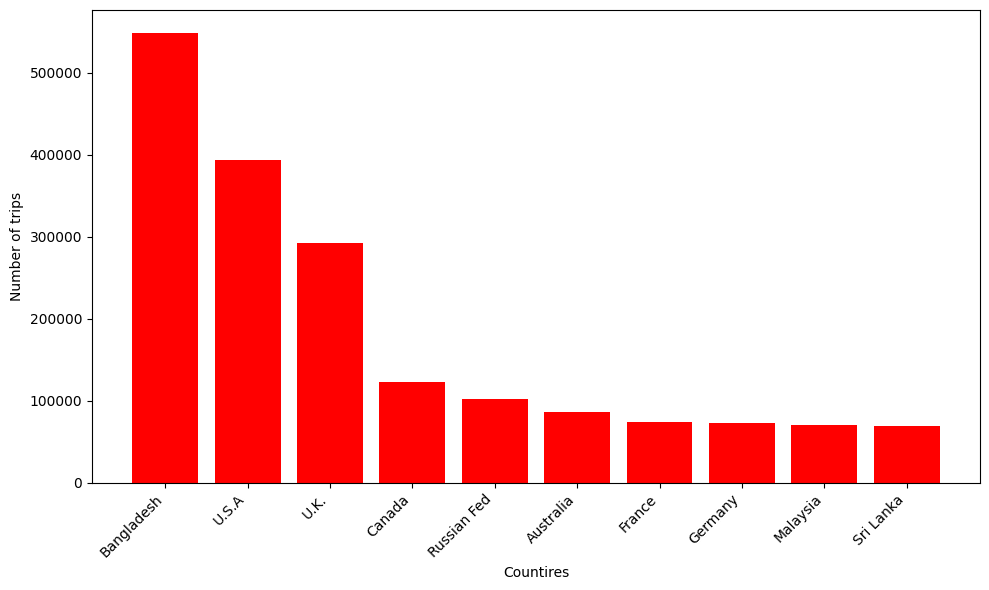

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10[year], color='red')
plt.xlabel('Countires')
plt.ylabel('Number of trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

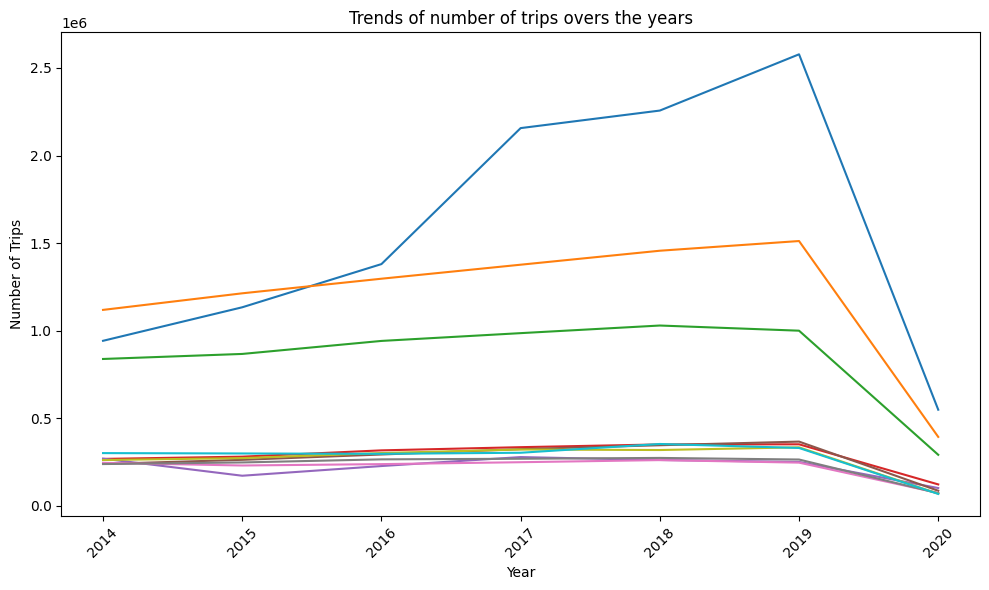

In [46]:
plt.figure(figsize=(10,6))
for country in top_10['Country']:
    plt.plot(country_yearly.columns[1:], country_yearly[country_yearly['Country']==country].iloc[:,1:]. values.flatten(), label=country_yearly)
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.title('Trends of number of trips overs the years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

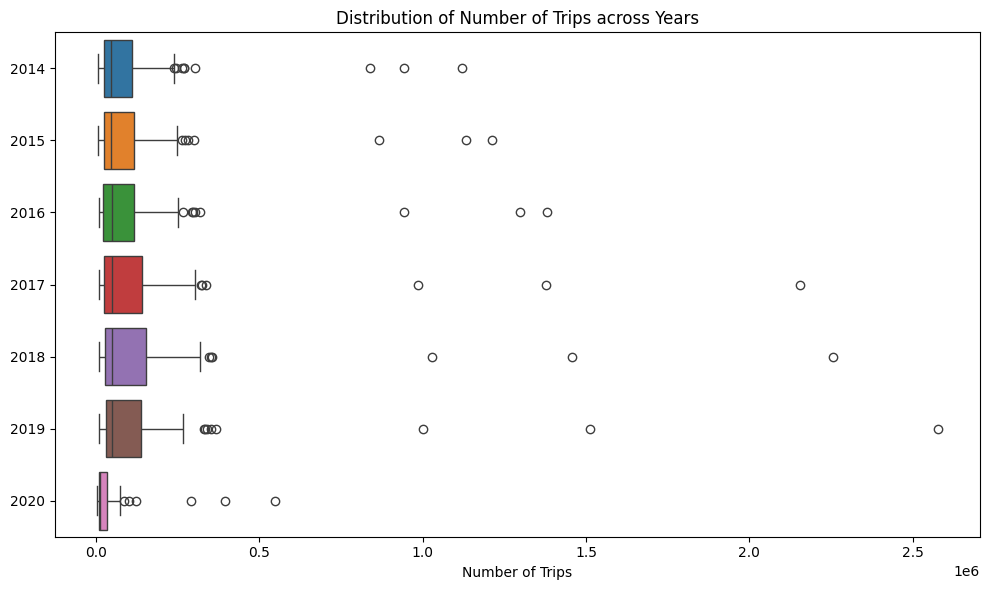

In [47]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=country_yearly.drop(columns='Country'), orient='h')
plt.xlabel('Number of Trips')
plt.title('Distribution of Number of Trips across Years')
plt.tight_layout()
plt.show()

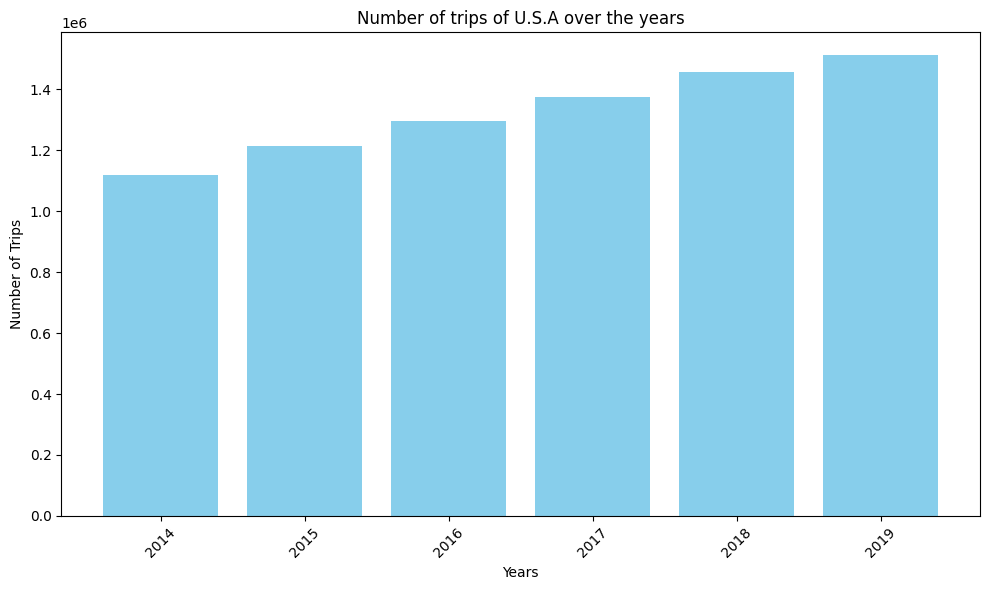

In [48]:
country = 'U.S.A'

country_data = country_yearly[country_yearly['Country'] == country].drop(['2020'], axis=1)

#Extracting years and the number of trips
years = country_data.columns[1:]
trips = country_data.values.flatten()[1:]

#Graph
plt.figure(figsize=(10,6))
plt.bar(years, trips, color='skyblue')
plt.xlabel('Years')
plt.ylabel('Number of Trips')
plt.title(f'Number of trips of {country} over the years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X =  data_with_growth_rate.drop(columns=['Country', '2020'])  # Features (excluding 'Country' and the target year)
y =  data_with_growth_rate['2020']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Initializing the linear regression model
model = LinearRegression()

# Fitting the model 
model.fit(X_train, y_train)


LinearRegression()

In [52]:
# Making predictions 
y_pred = model.predict(X_test)
y_pred

array([ 97159.21633877,  84427.38010765, 108912.87609342, 646940.69391454,
         8776.03512818,  19600.25670799,  32810.02962412,   8670.81080905,
        77653.67133837,   6689.77634   ,  42783.55991639,  62878.67356705,
         5828.72991343])

In [53]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 976638892.1224414
R-squared: 0.9494584753821169


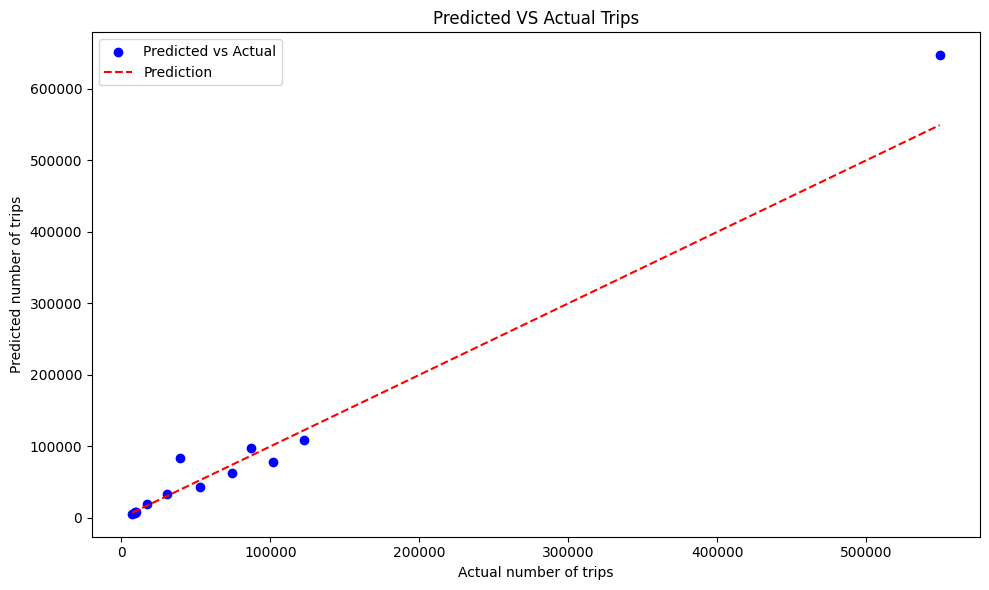

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Prediction')
plt.xlabel('Actual number of trips')
plt.ylabel('Predicted number of trips')
plt.title('Predicted VS Actual Trips')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
growth_rate = ['growth_rate_2014', 'growth_rate_2015', 'growth_rate_2016', 'growth_rate_2017', 'growth_rate_2018', 'growth_rate_2019_2020']

average_growth_rate = data_with_growth_rate[growth_rate].mean()

overall_average_growth_rate = average_growth_rate.mean()

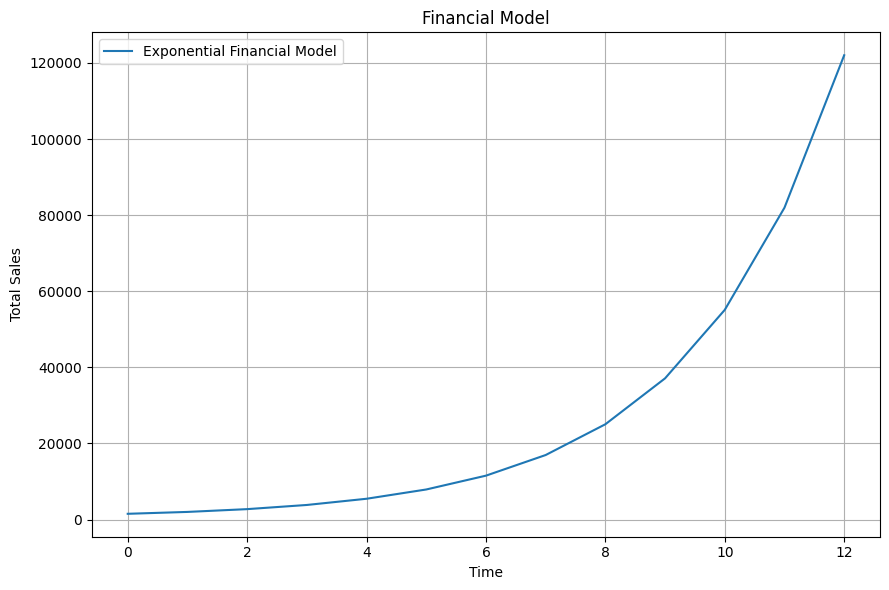

In [56]:
# Exponential financial model function
def exponential_financial_model(a, b, x_t, c):
    return a * np.exp(b * x_t) + c

# Parameters
m = 1000  # Pricing of the product
c = 500   # Production, maintenance, etc. costs
a = 1000  # Initial profit
b = 0.4   # Growth rate (example value)

# X(t)
x_values = np.arange(0, 13, 1)  # This indicates the sales in one year

total_profit_exponential = exponential_financial_model(a, b, x_values, c)

plt.figure(figsize=(9, 6))
plt.plot(x_values, total_profit_exponential, label='Exponential Financial Model')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('Financial Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()